# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [33]:
import numpy as np
from scipy import optimize 
from matplotlib import pyplot as plt 
plt.style.use("seaborn") 
%matplotlib inline

import matplotlib.pyplot as plt # baseline module
from mpl_toolkits.mplot3d import Axes3D # for 3d figures
plt.style.use('seaborn-whitegrid') 

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

git init https://github.com/NumEconCopenhagen/projects-2022-team-hjn.git


SyntaxError: invalid syntax (1477477143.py, line 18)

# Question 1

**Explain how you solve the model**

In [2]:
# utility function 

"""defining parameters"""

mp ={'y':1,'p':0.2,'theta':-2} # just add parameters to this dictionary

"""defining functions"""

def premium(q,mp):
    return mp['p']*q

def utility(z,mp):
  
    return (z**(1+mp['theta']))/(1+mp['theta'])


def expected_utility(x, q, mp):

    z_1 = mp['y'] - x + q - premium(q,mp)
    z_2 = mp['y'] - premium(q,mp)

    return mp['p']*utility(z_1,mp)+(1-mp['p'])*utility(z_2,mp)



In [3]:
"""i. constructing a function, that finds the optimal q for given levels of x,y,p"""

x_guess=0.4 #an initial guess
N=10
q_optimal=np.linspace(0.0,x_guess,N)
u_vector = np.empty(N)

u_best = -np.inf # initial maximum
q_best = np.nan # not-a-number

for i,q in enumerate(q_optimal):
    u_now = u_vector[i] = expected_utility(x_guess, q, mp)
    if u_now>u_best:
        q_best=q
        u_best=expected_utility(x_guess, q, mp)
        
print(f'Optimal level with loop is {u_best:.3f} at q = {q_best:.3f}')


Optimal level with loop is -1.087 at q = 0.400


In [4]:
"""ii.+iii. - making a grid and optimizing for different levels of x""" 
N=10 #number of elements
x=np.linspace(0.01,0.9,N) # an array of N number of x's equally distributed in the range

for i in x:
    initial_guess = [i/2]
    obj = lambda q: -expected_utility(i, q, mp)
    res=optimize.minimize_scalar(obj, initial_guess, method="bounded",bounds=(1e-5,i))
    q_star=res.x 
 
    print(f"For x = {i:.3f} the optimal q is {q_star:.3f}")

For x = 0.010 the optimal q is 0.010
For x = 0.109 the optimal q is 0.109
For x = 0.208 the optimal q is 0.208
For x = 0.307 the optimal q is 0.307
For x = 0.406 the optimal q is 0.406
For x = 0.504 the optimal q is 0.504
For x = 0.603 the optimal q is 0.603
For x = 0.702 the optimal q is 0.702
For x = 0.801 the optimal q is 0.801
For x = 0.900 the optimal q is 0.900


Text(0.5, 1.0, 'Optimal coverage amount q as a function of monetary loss x')

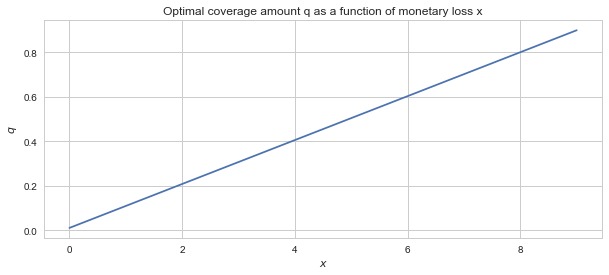

In [5]:
"""Plotting the x's and the q_star's"""
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)

ax.plot(x)
ax.grid(True)

# b. add labels
ax.set_xlabel('$x$')
ax.set_ylabel('$q$')
ax.set_title('Optimal coverage amount q as a function of monetary loss x')


We see that it is optimal for the coverage amount to cover all monetary loss. 

# Question 2

In [13]:
mp['x']=0.6 #adding value of x to the dictionary with all the model parameters
print(mp) #checking to see that it is added

"""checking what the expected value for the uninsured is"""

def expected_utility_uninsured(mp):
    return mp['p']*utility(mp['y'] - mp['x'],mp)+(1-mp['p'])*utility(mp['y'],mp)

print("expected value for the uninsured is:")
print(expected_utility_uninsured(mp))




{'y': 1, 'p': 0.2, 'theta': -2, 'x': 0.6}
expected value for the uninsured is:
-1.3


In [31]:
"""Constructing grid"""

N=10 #number of elements
q=np.linspace(0.01,0.6,N) # an array of N number of x's equally distributed in the range
premium_vector=np.zeros(N)

for i, q in enumerate(q):
    initial_guess = [i/2]
    obj_2 = lambda x: premium(q,mp)
    res=optimize.minimize_scalar(obj_2, initial_guess, method="bounded",bounds=(0,i))
    pi_star=res.x

 
    print(f"For q = {i:.3f} the optimal premium is {pi_star:.3f}")


For q = 0.000 the optimal premium is 0.000
For q = 1.000 the optimal premium is 1.000
For q = 2.000 the optimal premium is 2.000
For q = 3.000 the optimal premium is 3.000
For q = 4.000 the optimal premium is 4.000
For q = 5.000 the optimal premium is 5.000
For q = 6.000 the optimal premium is 6.000
For q = 7.000 the optimal premium is 7.000
For q = 8.000 the optimal premium is 8.000
For q = 9.000 the optimal premium is 9.000


In [29]:
"defining functions"

def premium(q,mp):
    return mp['p']*q

def utility(z,mp):
  
    return (z**(1+mp['theta']))/(1+mp['theta'])


def expected_utility(x, q, mp):

    z_1 = mp['y'] - mp['x'] + q - premium(q,mp)
    z_2 = mp['y'] - premium(q,mp)

    return mp['p']*utility(z_1,mp)+(1-mp['p'])*utility(z_2,mp)

"ii. - making a grid " 
N=10 #number of elements
q=np.linspace(0.1,0.9,N) # values of x

for i in q:
    obj = lambda q: -expected_utility(i, q, mp)
    res=optimize.minimize_scalar(obj, initial_guess, method="bounded",bounds=(1e-5,i))
    q_star=res.x 
 
    print(f"For x = {i:.3f} the optimal q is {q_star:.3f}")

For x = 0.100 the optimal q is 0.100
For x = 0.189 the optimal q is 0.189
For x = 0.278 the optimal q is 0.278
For x = 0.367 the optimal q is 0.367
For x = 0.456 the optimal q is 0.456
For x = 0.544 the optimal q is 0.544
For x = 0.633 the optimal q is 0.600
For x = 0.722 the optimal q is 0.600
For x = 0.811 the optimal q is 0.600
For x = 0.900 the optimal q is 0.600


Explain your code and procedure

# Question 3

Explain your code and procedure

In [101]:
# defining parameters
N = 10000
alpha = 2
beta = 7


q=gamma*x

z=mp['y']-(1-gamma)*x-pi

# drawing from beta distribution
x_3 = np.random.beta(alpha,beta,size=N)


# c. transformation function
from math import cos, exp, pi
from scipy.integrate import quad

def v(gamma,pi):
    return utility(z,mp)

# call quad to integrate v from 0 to 1
res, err = quad(v, 0, 1)




# Question 4

In [109]:
# customer wants gamma=0.95, which pi do we set?
# offer just acceptable for consumer --> u_ins=u_unins --> use root finder for that
# Monte Carlo simulate draws from Beta distribution (for-loop):
## each time root find pi to set u_ins-u_unins=0 --> save pi
## take average over pi's



NameError: name 'scipy' is not defined

ADD CONCISE CONLUSION.